In [1]:
import pandas as pd
import numpy as np

In [8]:
np.random.seed(42)

data={
    "Feature1":np.random.rand(40),
    "Feature2":np.random.rand(40),
    "Feature3":np.random.rand(40),
    "Target":np.random.randint(low = 0, high = 3, size = 40)
}

df=pd.DataFrame(data)
df

,Feature1,Feature2,Feature3,Target
0,0.374540,0.122038,0.863103,1
1,0.950714,0.495177,0.623298,2
2,0.731994,0.034389,0.330898,0
3,0.598658,0.909320,0.063558,2
4,0.156019,0.258780,0.310982,1
5,0.155995,0.662522,0.325183,0
6,0.058084,0.311711,0.729606,0
7,0.866176,0.520068,0.637557,0
8,0.601115,0.546710,0.887213,2
9,0.708073,0.184854,0.472215,1


In [21]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['Feature1'], y=df['Feature2'], z=df['Feature3'],
              color=df['Target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.write_html('3d_plot.html')


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  40 non-null     float64
 1   Feature2  40 non-null     float64
 2   Feature3  40 non-null     float64
 3   Target    40 non-null     int32  
dtypes: float64(3), int32(1)
memory usage: 1.2 KB


In [34]:
import plotly.graph_objects as go
# Creating 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=df['Feature1'],
    y=df['Feature2'],
    z=df['Feature3'],
    mode='markers',
    marker=dict(
        size=10,
        color=df['Target'],                # Color points by Target variable
        colorscale='tealrose',   # choose a colorscale
        opacity=0.8
    )
)])

# Updating layout
fig.update_layout(scene=dict(
                    xaxis_title='Feature 1',
                    yaxis_title='Feature 2',
                    zaxis_title='Feature 3'
                ))

# Show plot
fig.write_html('3d_plot.html')


In [35]:
from sklearn.preprocessing import StandardScaler

features=['Feature1','Feature2','Feature3']

st=StandardScaler()
df[features]=st.fit_transform(df[features])
df.head()

,Feature1,Feature2,Feature3,Target
0,-0.279915,-1.122676,1.296991,1
1,1.693517,0.062449,0.441476,0
2,0.944387,-1.401061,-0.601672,1
3,0.487704,1.377810,-1.555417,0
4,-1.028364,-0.688371,-0.672722,0


In [36]:
covariance_matrix=df[['Feature1','Feature2','Feature3']].cov()
covariance_matrix

,Feature1,Feature2,Feature3
Feature1,1.025641,0.157879,0.252940
Feature2,0.157879,1.025641,0.049420
Feature3,0.252940,0.049420,1.025641


In [37]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [38]:
eigenvalues

array([1.34752522, 0.74790873, 0.98148913])

In [39]:
eigenvectors

array([[ 0.67892362,  0.73027203,  0.07593074],
       [ 0.42492903, -0.30648762, -0.85176326],
       [ 0.59874705, -0.61054738,  0.51839547]])

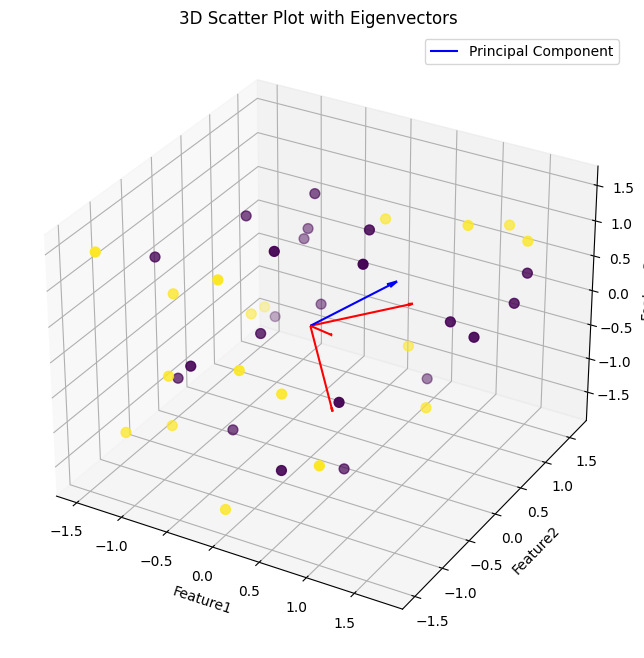

In [40]:
import matplotlib.pyplot as plt
# Find the index of the largest eigenvalue
max_eigenvalue_index = np.argmax(eigenvalues)
principal_component = eigenvectors[:, max_eigenvalue_index]

# Scatter plot of the data points
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Feature1'], df['Feature2'], df['Feature3'], c=df['Target'], cmap='viridis', s=50)

# Plotting eigenvectors
for i in range(len(eigenvectors)):
    ax.quiver(0, 0, 0, eigenvectors[i, 0], eigenvectors[i, 1], eigenvectors[i, 2], color='r', arrow_length_ratio=0.05)

# Plotting principal component
ax.quiver(0, 0, 0, principal_component[0], principal_component[1], principal_component[2], color='b', arrow_length_ratio=0.1, label='Principal Component')

# Set labels and title
ax.set_xlabel('Feature1')
ax.set_ylabel('Feature2')
ax.set_zlabel('Feature3')
ax.set_title('3D Scatter Plot with Eigenvectors')

# Add legend
ax.legend()

# Show plot
plt.show()